In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [10]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('pima-indians-diabetes.csv', header=None, names=col_names)

In [11]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
X = pima[feature_cols]
y = pima.label

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## 使用决策树预测糖尿病

In [14]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [15]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7272727272727273


## 可视化训练好的决策树模型

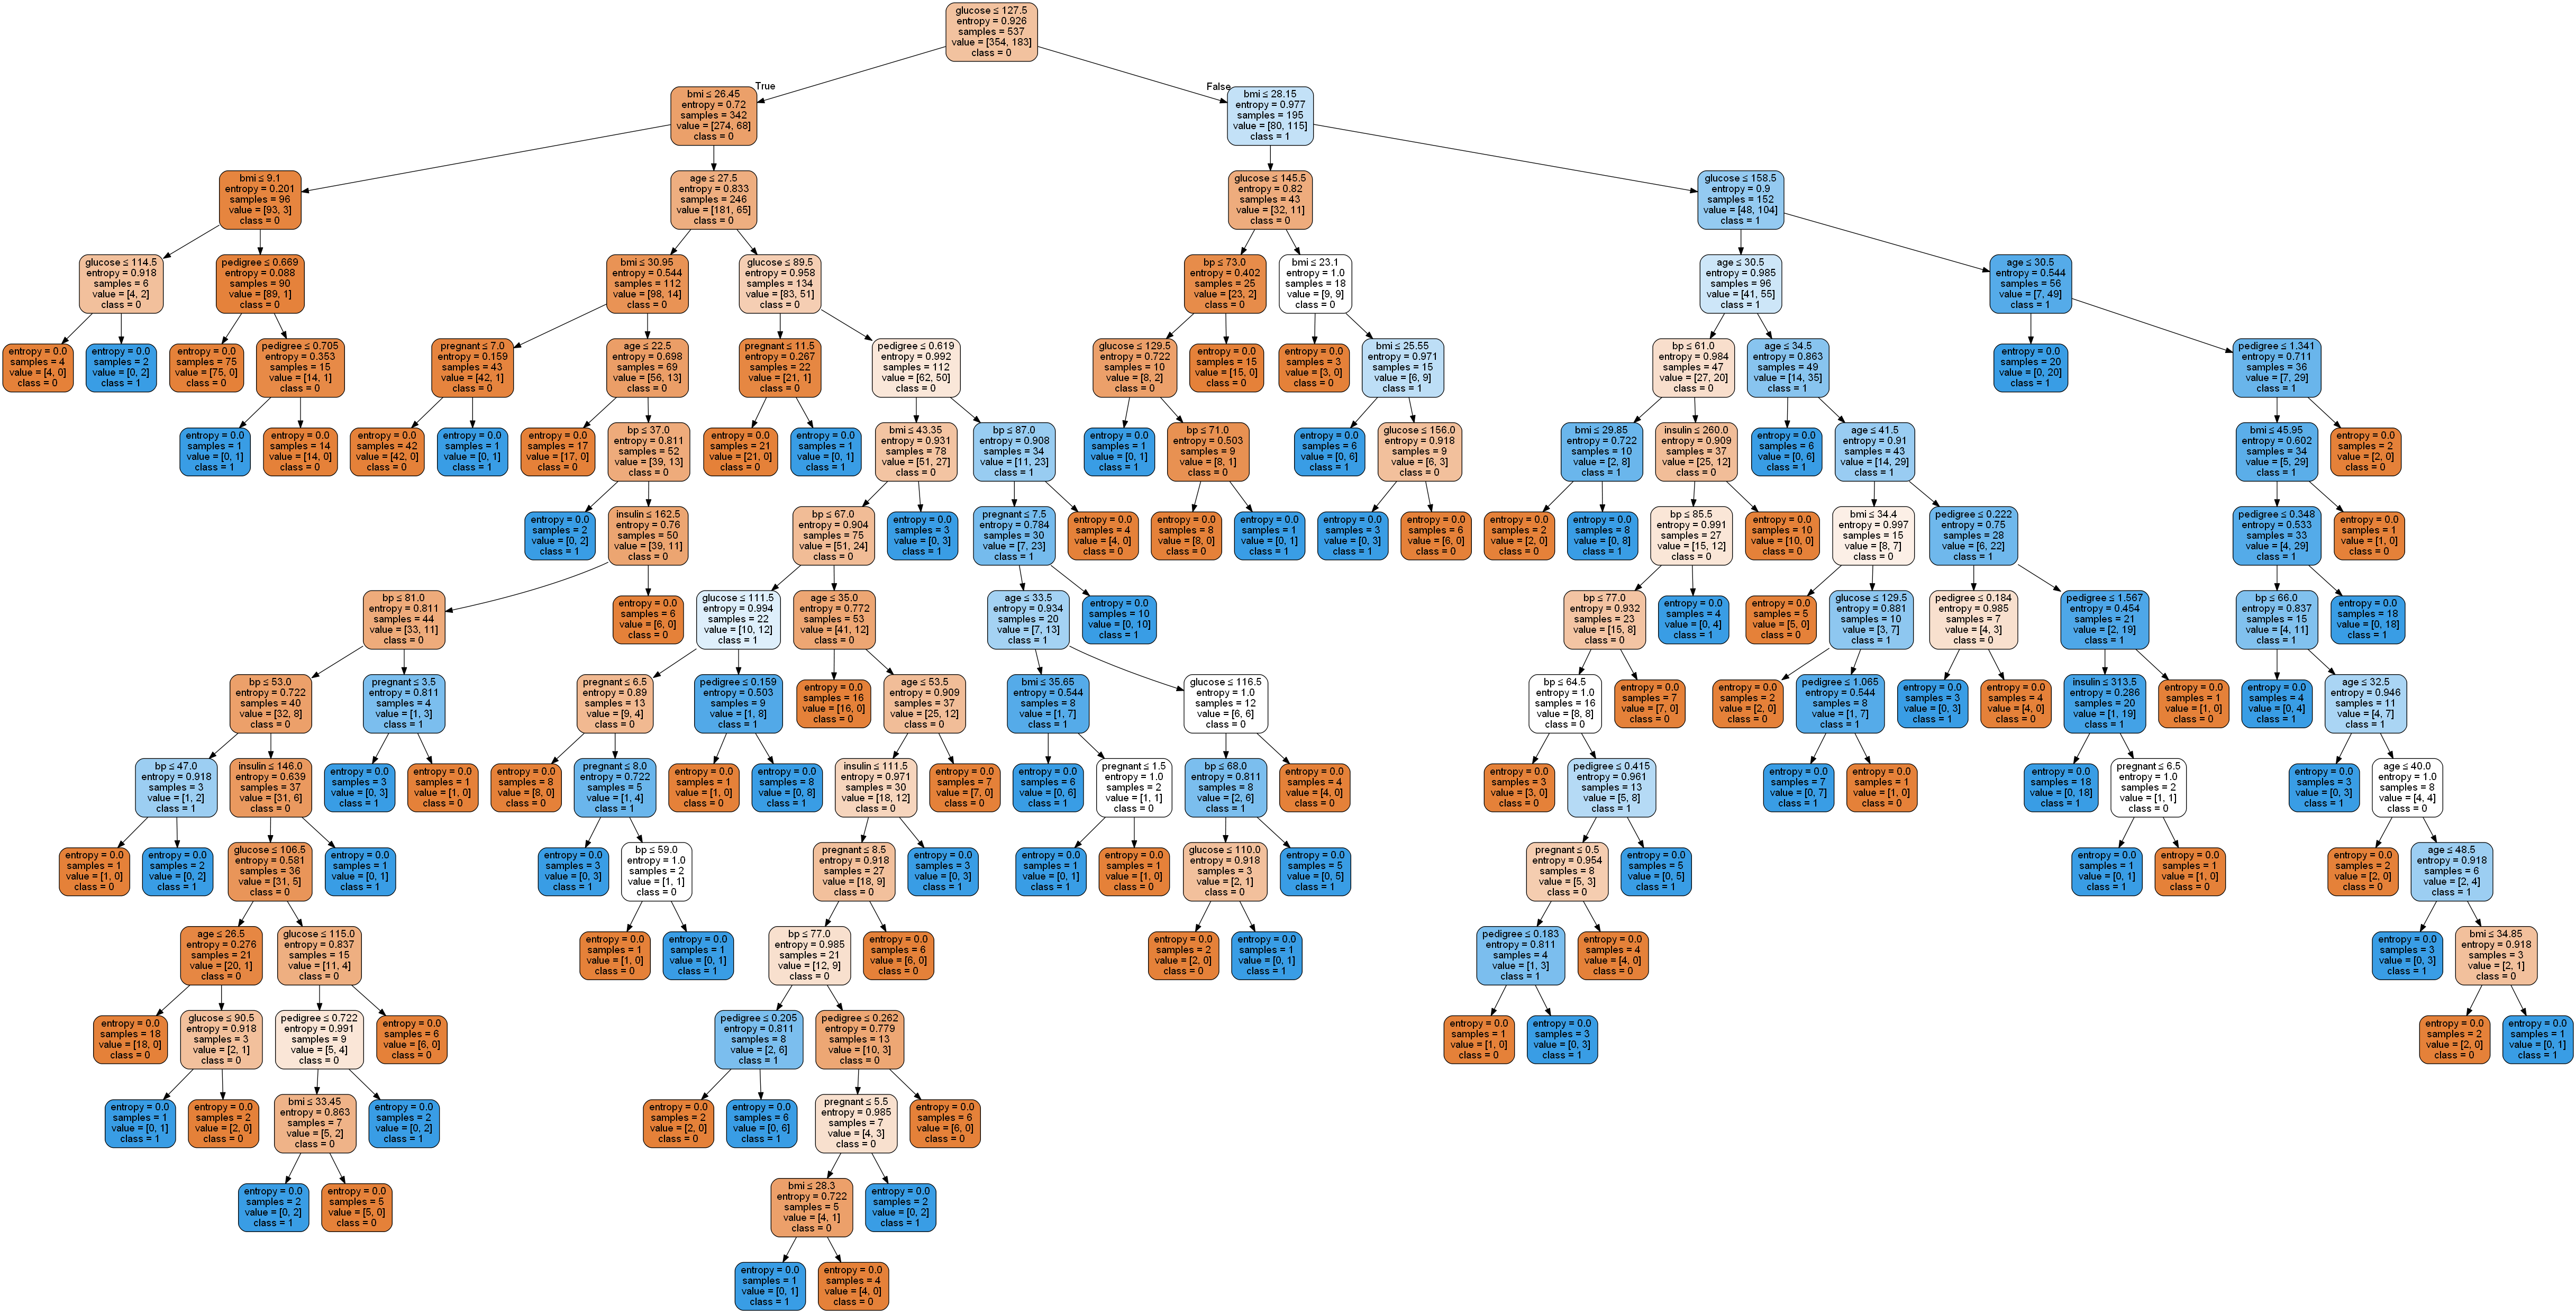

In [16]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=feature_cols, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [38]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=7)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7792207792207793


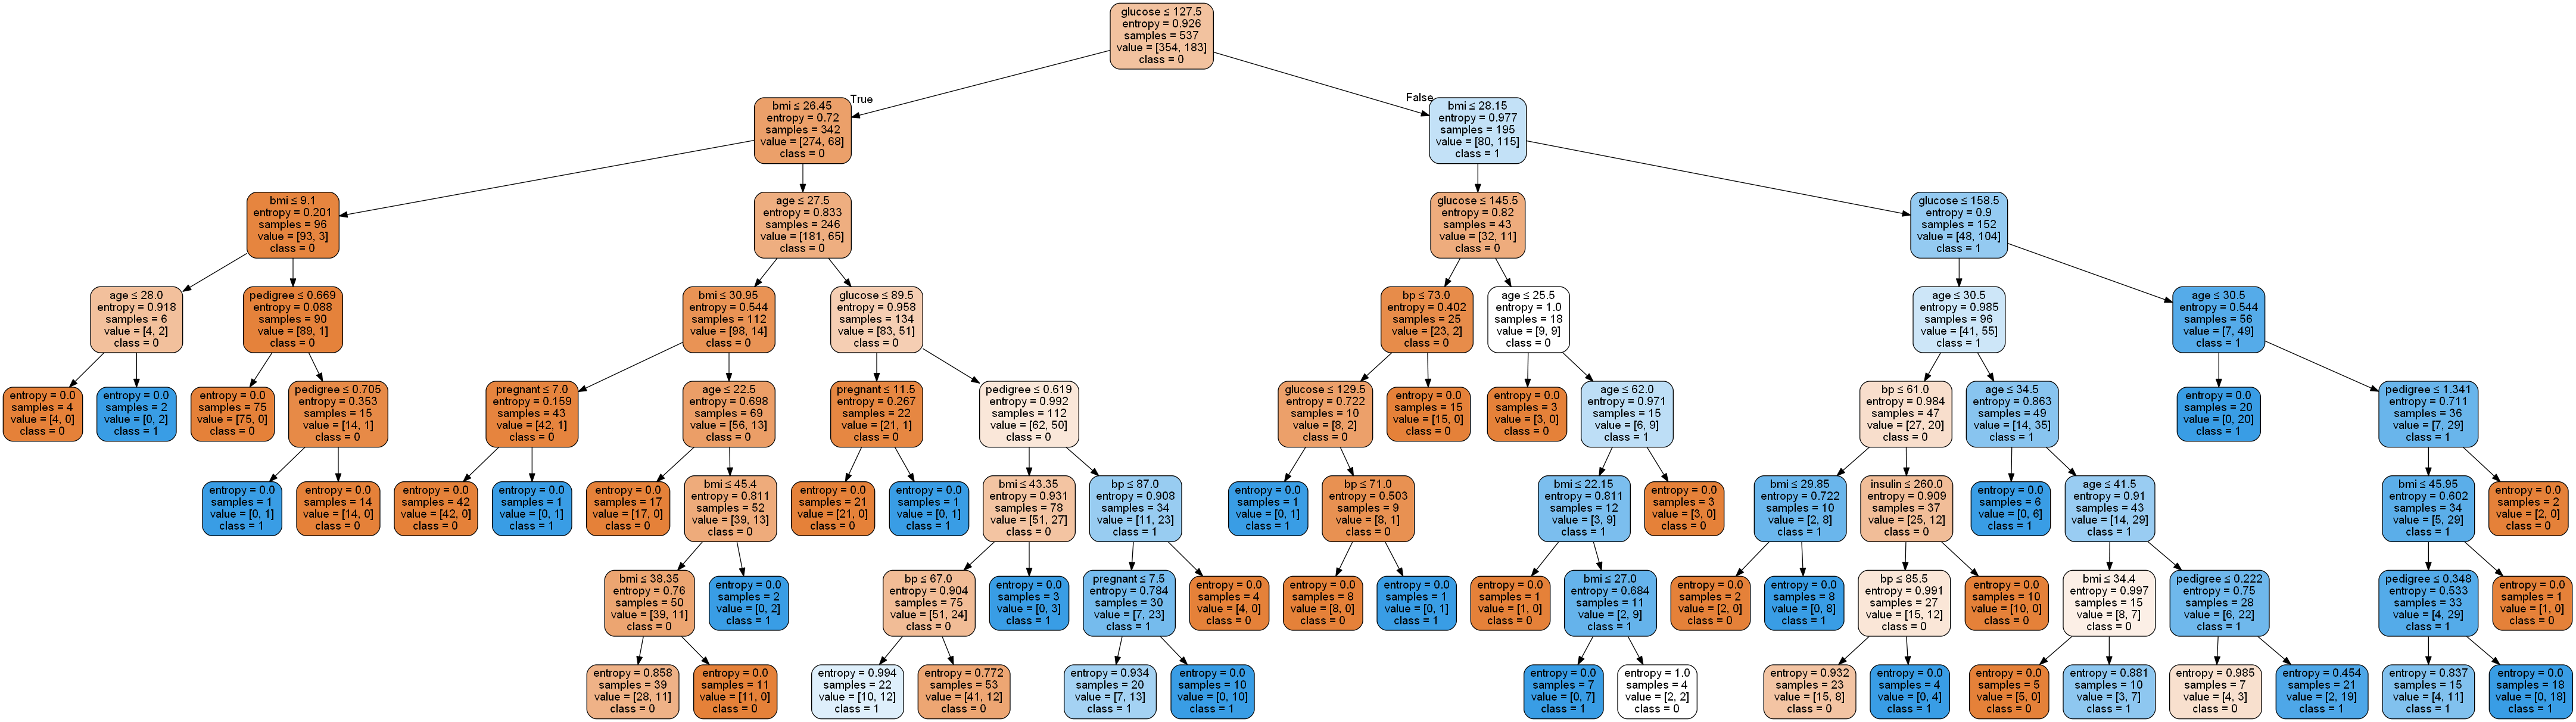

In [39]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=feature_cols, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes2.png')
Image(graph.create_png())

## 使用随机森林做预测


In [19]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rf = RandomForestClassifier(criterion='entropy', n_estimators=1000, min_samples_split=10, max_depth=None)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8051948051948052
